# H $\beta$ flare 2017 4846

In [1]:
import time

time.sleep(60*110)

In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
from matplotlib import transforms

import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un


In [3]:
import os

# Specify the path to the folder you want to list files from
folder_path = "E:/solar flares/data/2017-09-10/fits/4846/"
# "E:\solar flares\data\2017-09-10\fits\4846\"
# "nb_4846_2017-09-10T16_23_50_scan=5_corrected.fits"

# Get a list of all files and directories in the specified path
file_list = os.listdir(folder_path)
file_list.sort()
# Print the names of files and directories
print(f"{len(file_list)} Files in '{folder_path}':")
indices = []
for item in file_list:
    print(item)
    i = item.split("=")[1]
    i = i.split("_")[0]
    indices.append(int(i))
indices.sort()
ntime = len(indices)
print(f"number of indices: {ntime}")

def timeframe_to_filename_fits(frame):
    if frame <0 or frame >= ntime:
        raise IndexError(f'frame number {frame} is not in (0, {ntime}).')
    else:
        return f"{folder_path}nb_4846_2017-09-10T16_23_50_scan={indices[frame]}_corrected.fits"
ttff = timeframe_to_filename_fits



233 Files in 'E:/solar flares/data/2017-09-10/fits/4846/':
nb_4846_2017-09-10T16_23_50_scan=100_corrected.fits
nb_4846_2017-09-10T16_23_50_scan=101_corrected.fits
nb_4846_2017-09-10T16_23_50_scan=102_corrected.fits
nb_4846_2017-09-10T16_23_50_scan=103_corrected.fits
nb_4846_2017-09-10T16_23_50_scan=104_corrected.fits
nb_4846_2017-09-10T16_23_50_scan=105_corrected.fits
nb_4846_2017-09-10T16_23_50_scan=106_corrected.fits
nb_4846_2017-09-10T16_23_50_scan=107_corrected.fits
nb_4846_2017-09-10T16_23_50_scan=108_corrected.fits
nb_4846_2017-09-10T16_23_50_scan=109_corrected.fits
nb_4846_2017-09-10T16_23_50_scan=10_corrected.fits
nb_4846_2017-09-10T16_23_50_scan=110_corrected.fits
nb_4846_2017-09-10T16_23_50_scan=111_corrected.fits
nb_4846_2017-09-10T16_23_50_scan=112_corrected.fits
nb_4846_2017-09-10T16_23_50_scan=113_corrected.fits
nb_4846_2017-09-10T16_23_50_scan=114_corrected.fits
nb_4846_2017-09-10T16_23_50_scan=115_corrected.fits
nb_4846_2017-09-10T16_23_50_scan=116_corrected.fits
nb_484

In [4]:
head0 = f.getheader(ttff(0))
head0, head0["DATE-AVG"]

(SIMPLE  =                    T / Written by IDL:  Tue Nov  6 16:53:06 2018      
 BITPIX  =                  -32 /                                                
 NAXIS   =                    5 / Number of data axes                            
 NAXIS1  =                 1632 /                                                
 NAXIS2  =                 1094 /                                                
 NAXIS3  =                   21 /                                                
 NAXIS4  =                    1 /                                                
 NAXIS5  =                    1 /                                                
 EXTEND  =                    T / The file has extension(s).                     
 TIMESYS = 'UTC     '           /                                                
 DATE    = '2018-11-06T16:53:06' / Creation UTC date of FITS header              
 CONTINUE  'bd' /  MOMFBD restored data                                          
 VAR_KEYS= 'VAR-

In [5]:
def tframe_to_time(frame):
    head0 = f.getheader(ttff(frame))
    t = head0["DATE-AVG"]
    return t[11:19]
time_list = [tframe_to_time(frame) for frame in range(ntime)]
time_list, len(time_list)

(['16:25:24',
  '16:25:44',
  '16:26:04',
  '16:26:23',
  '16:26:43',
  '16:27:03',
  '16:27:23',
  '16:27:43',
  '16:28:02',
  '16:28:22',
  '16:28:41',
  '16:29:01',
  '16:29:20',
  '16:30:39',
  '16:30:59',
  '16:31:19',
  '16:31:39',
  '16:31:59',
  '16:32:19',
  '16:32:38',
  '16:32:58',
  '16:33:18',
  '16:33:38',
  '16:33:57',
  '16:34:18',
  '16:34:38',
  '16:34:59',
  '16:35:18',
  '16:35:38',
  '16:35:58',
  '16:36:17',
  '16:36:37',
  '16:36:57',
  '16:37:18',
  '16:37:38',
  '16:37:58',
  '16:38:19',
  '16:38:39',
  '16:38:58',
  '16:39:19',
  '16:39:39',
  '16:39:58',
  '16:40:18',
  '16:40:39',
  '16:40:58',
  '16:41:18',
  '16:41:39',
  '16:41:59',
  '16:42:19',
  '16:42:38',
  '16:42:58',
  '16:43:18',
  '16:43:38',
  '16:43:59',
  '16:44:21',
  '16:44:41',
  '16:45:01',
  '16:45:21',
  '16:45:41',
  '16:46:01',
  '16:46:22',
  '16:46:44',
  '16:47:05',
  '16:47:28',
  '16:47:50',
  '16:48:13',
  '16:48:36',
  '16:48:58',
  '16:49:20',
  '16:49:42',
  '16:50:04',
  '16:

In [6]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    for hdl in io:
        print(hdl.data)
    wvl = io[1].data[0][0]
    print(wvl)
    print(np.shape(wvl))

extent = wvl[0]

wvl = wvl[:,0, 0, 2]*10
print(wvl)

np.save('line_data/wav_sstHbeta.npy', wvl)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002614F477810>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002614F3ACF50>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002614F3A4250>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002614F3A6250>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002614F3A5F90>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002614F3B8110>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002614F3B8290>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002614F3BA490>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002614F3B9150>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000002614F3D0950>]
[[[[[4.02589184e-10 4.04456191e-10 4.05898565e-10 ... 4.51723068e-08
     4.50724436e-08 4.49729889e-08]
    [4.01987110e-10 4.03888395e-10 4.05334322e-10 ... 4.53421976e-08
     4.52233486e-08 4.51146640e-08]
    [4.01108285e-10 4.03009071e-10 4.04418388e-10 ... 4.55349856e-08
     4.54240947e-08 4.53

In [7]:
def datacube(timeframe):
    if timeframe < ntime and timeframe >= 0:
        return f.getdata(ttff(timeframe))
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames {ntime}."
        )

E:/solar flares/data/2017-09-10/fits/4846/nb_4846_2017-09-10T16_23_50_scan=4_corrected.fits
s=(21, 1094, 1632)
the shape of the data is (233, '??', 21, 1094, 1632)
the wavelengths are self._wavel = array([4859.79946, 4859.99955, 4860.19964, 4860.30062, 4860.39973,
       4860.50071, 4860.59982, 4860.7008 , 4860.79991, 4860.90089,
       4861.     , 4861.09911, 4861.20009, 4861.2992 , 4861.40018,
       4861.49929, 4861.60027, 4861.69938, 4861.80036, 4862.00045,
       4862.20054])
defining no boundary for shape (233, '??', 21, 1094, 1632)

(1094, 1632) (1094, 1632)
Boundary
Blue=Outside, yellow=Inside


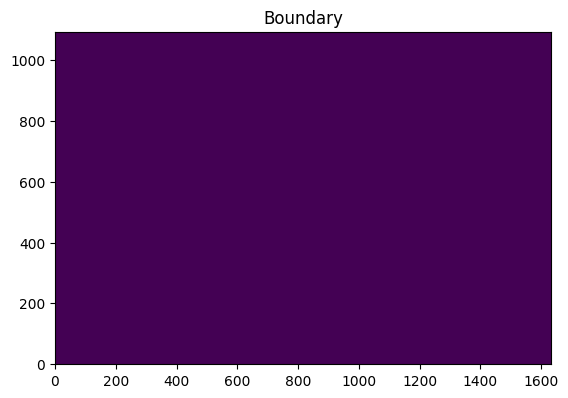

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [8]:
reload(un)
Hbeta = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_sstHbeta.npy', number_of_frames=ntime,
                 time=time_list, name_of_line='Hbeta17a', thresh=[0, np.percentile(datacube(0), 99.5)],  boundary_methode='No Boundary', 
                 boundary_arguments = {"error":0.4, "index_of_zero":[1,2,3,4,5,6,7]}, with_stokes=True, with_time=True)

# Hbeta.datacube
# np.shape(Hbeta.datacube), Hbeta.datacube(0)[0:30:5,10:20:5, 100:200:30], 
Hbeta.boundary


In [9]:
Hbeta.calculate__FOV_spect_over_time()

In [10]:
secs = un.get_TIME(Hbeta)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{Hbeta.shape=}')

the mean cadence is 21.54310344827588 seconds for this line!
Hbeta.shape=(233, '??', 21, 1094, 1632)


The guessed filters are [[3.0, 2.625], [10.0, 2.625], [17.0, 2.625]]


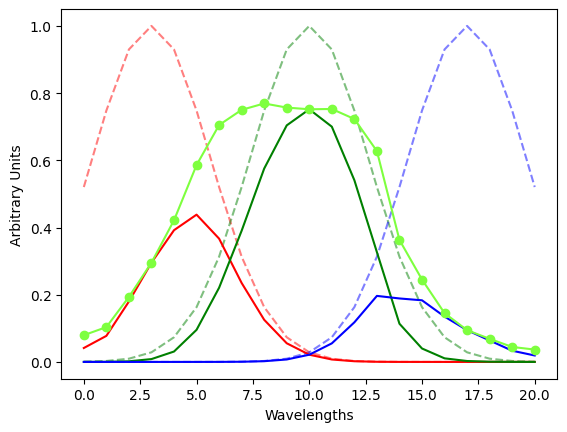

In [11]:
# %matplotlib inline
Hbeta.update_filters(None)
Hbeta.plot_filt(880,900)
plt.show()

IMPORTANT MESSAGE
The middel of the outside lines is in the data.
 Give manualy the RGB value of the outside in.
zero was: [2.2650405e-10 3.0325550e-10 3.7902489e-10 4.3703621e-10 4.8129478e-10
 5.0799176e-10 5.9622263e-10 6.6564715e-10 8.3365498e-10 8.0450907e-10
 1.6856867e-09 1.5613730e-09 2.2331346e-09 1.4942516e-09 1.0014092e-09
 7.1897255e-10 5.0319221e-10 3.2309846e-10 3.0048450e-10 2.9149480e-10
 2.8744793e-10]
The error for matching intensities is 0.4


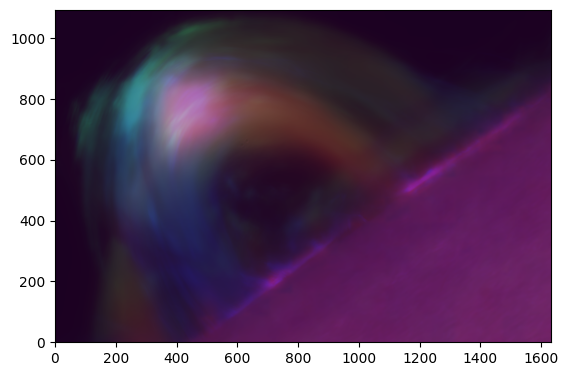

(1094, 1632, 3)
IMPORTANT MESSAGE
The middel of the outside lines is in the data.
 Give manualy the RGB value of the outside in.
zero was: [2.2650405e-10 3.0325550e-10 3.7902489e-10 4.3703621e-10 4.8129478e-10
 5.0799176e-10 5.9622263e-10 6.6564715e-10 8.3365498e-10 8.0450907e-10
 1.6856867e-09 1.5613730e-09 2.2331346e-09 1.4942516e-09 1.0014092e-09
 7.1897255e-10 5.0319221e-10 3.2309846e-10 3.0048450e-10 2.9149480e-10
 2.8744793e-10]
The error for matching intensities is 0.4


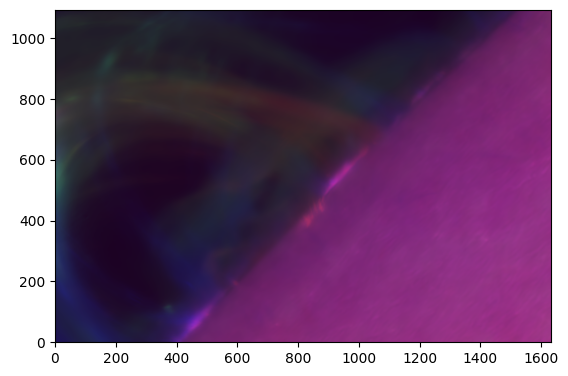

(1094, 1632, 3)
IMPORTANT MESSAGE
The middel of the outside lines is in the data.
 Give manualy the RGB value of the outside in.
zero was: [2.2650405e-10 3.0325550e-10 3.7902489e-10 4.3703621e-10 4.8129478e-10
 5.0799176e-10 5.9622263e-10 6.6564715e-10 8.3365498e-10 8.0450907e-10
 1.6856867e-09 1.5613730e-09 2.2331346e-09 1.4942516e-09 1.0014092e-09
 7.1897255e-10 5.0319221e-10 3.2309846e-10 3.0048450e-10 2.9149480e-10
 2.8744793e-10]
The error for matching intensities is 0.4


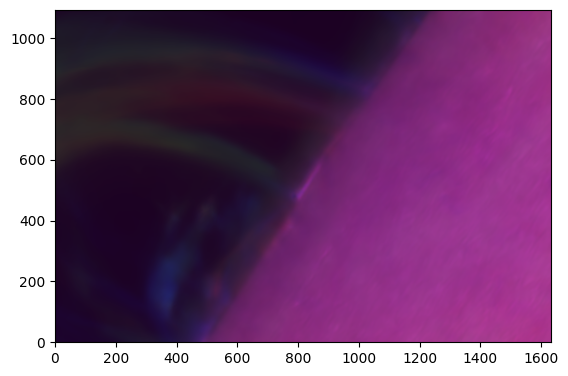

(1094, 1632, 3)


In [12]:
# %matplotlib widget
for frame in range(0,Hbeta._number_of_frames, 100):
    # frame=0
    Hbeta.ccp_frame(frame,Show=False)
    plt.imshow(Hbeta.current_ccp, origin='lower')
    plt.imshow(Hbeta.calculate_boundary(frame=frame), alpha=0.4, origin="lower")

    # plt.imshow(Hbeta.boundary, origin='lower', alpha=0.2)
    plt.show()
    print(np.shape(Hbeta.current_ccp))#,np.shape(Hbeta.boundary))

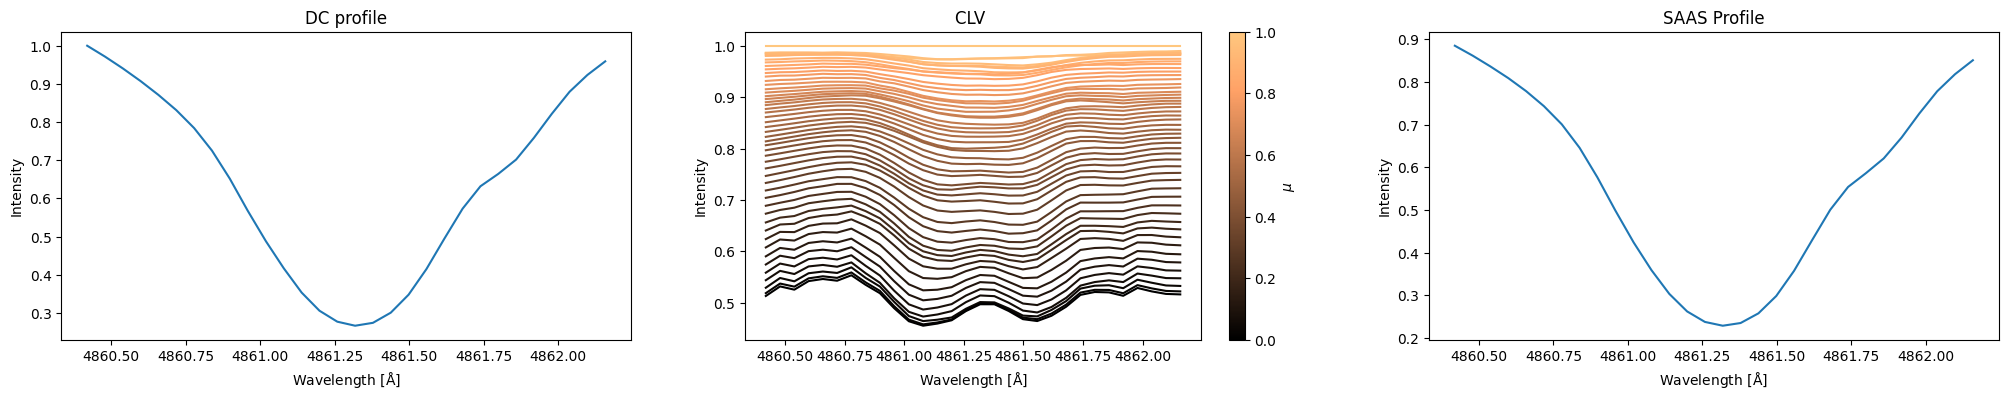

4861.288539927959 4861.288477594625


In [13]:
reload(un)
theor_Hbeta = un.linestudier('E:/solar flares/data/2017-09-06/fits/4861_clv.fits', nr=101)
print(np.median(theor_Hbeta.sst_wav), np.mean(theor_Hbeta.sst_wav))

## Calculating the $\mu$ !!!!! 


In [14]:
Hbeta.shape

(233, '??', 21, 1094, 1632)

In [15]:
def timeframe_to_extent(frame, timeframe_to_filename_fits, flip=False, invert=False, shift=(0,0)):
    with f.open(timeframe_to_filename_fits(frame)) as io :
        wvl = io[1].data[0][0]
    extent = wvl[0,0:2,0:2, 0:2]
    a,b = shift
    if not flip:
        extent = [extent[0,0, 0]+a, extent[1,1, 0]+a, extent[0,0, 1]+b, extent[1,1, 1]+b]
    else:
        extent = [extent[0,0, 1]+a, extent[1,1, 1]+a, extent[0,0, 0]+b, extent[1,1, 0]+b]
    if invert:
        extent = [extent[1], extent[0], extent[3], extent[2]]
    print(f"extent timeframe {frame} is ", extent)
    return extent

def extent2mid(extent):
    return ((extent[0]+extent[1])/2, (extent[2]+extent[3])/2)

def calculate_mu(x,y, radius=959.63):
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    rad_dist =  (x**2 + y**2)**0.5/radius
    return np.cos(np.arcsin(rad_dist))

import numpy as np

def rotate_mesh_around_average(xx, yy, angle):
  """
  Rotates an xy mesh around its average position.

  Args:
      xx: A 2D NumPy array representing the x-coordinates of the mesh.
      yy: A 2D NumPy array representing the y-coordinates of the mesh.
      angle: The rotation angle in radians. Positive values represent counter-clockwise rotation.

  Returns:
      A tuple of 2D NumPy arrays representing the rotated x and y coordinates (xx_rot, yy_rot).
  """

  # Calculate the average x and y coordinates
  avg_x = np.mean(xx)
  avg_y = np.mean(yy)

  # Shift the mesh to center it around the average
  xx_centered = xx - avg_x
  yy_centered = yy - avg_y

  # Rotate the centered mesh coordinates
  xx_rot = np.cos(angle) * xx_centered -np.sin(angle) * yy_centered  + avg_x
  yy_rot = np.sin(angle) * xx_centered + np.cos(angle) * yy_centered + avg_y

  return xx_rot, yy_rot



def extent_to_grid(extent, shape, invert=False, angle=0):

    x = np.linspace(extent[0], extent[1], shape[4])
    y = np.linspace(extent[2], extent[3], shape[3])
    if invert:
        x = x[::-1]
        y = y[::-1]

    xx, yy = np.meshgrid(x, y)
    if angle != 0:
        xx, yy = rotate_mesh_around_average(xx, yy, angle)

    MU = calculate_mu(xx,yy)
    print("does MU contain nan's?", np.any(np.isnan(MU)))
    return xx, yy, MU


def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]

def local_rotation(extent, rad_rot):
    mid = extent2mid(extent)
    x = np.array(mid) 
    R = np.array([[np.cos(rad_rot), -np.sin(rad_rot)], [np.sin(rad_rot), np.cos(rad_rot)]])
    y = np.dot(R, x)
    t = x-y

    return transforms.Affine2D().rotate_deg(rad_rot/np.pi*180).translate(t[0], t[1])

def square_full_mu_mesh(X,Y, angle, num=200):
    X = np.array([np.min(X), np.max(X)])
    Y = np.array([np.min(Y), np.max(Y)])
    X,Y = np.meshgrid(X,Y)
    X,Y = rotate_mesh_around_average(X,Y, angle)
    X = np.linspace(np.min(X), np.max(X), num)
    Y = np.linspace(np.min(Y), np.max(Y), num)
    X,Y = np.meshgrid(X,Y)
    MU = calculate_mu(X,Y)
    return MU, X, Y

def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name="", rotate=0):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        over.ccp_frame(timeFrame, Show=False)
        tr = local_rotation(extent, rotate)
        ax.imshow(Image.fromarray(over.current_ccp), transform=tr + ax.transData, origin='lower', extent=extent)
        K = MU * over.boundary
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    MU_, X, Y = square_full_mu_mesh(X,Y, angle=0, num=200)
    CS = ax.contour(X, Y, MU_)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        X, Y, _ = extent_to_grid(extent, (0,0,0,2,2), invert=False, angle=0)
        print(X,Y)
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp, rotate)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 

extent timeframe 0 is  [926.6195139920857, 988.4344139920858, -164.54742070844014, -123.12272070844016]


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_10172\466518928.py:29: RuntimeWarning: invalid value encountered in arcsin
  return np.cos(np.arcsin(rad_dist))


does MU contain nan's? True
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.12446393122797633 for timeframe 0
does MU contain nan's? True
[[926.61951399 988.43441399]
 [926.61951399 988.43441399]] [[-164.54742071 -164.54742071]
 [-123.12272071 -123.12272071]]
Coundourplot succesfully saved.


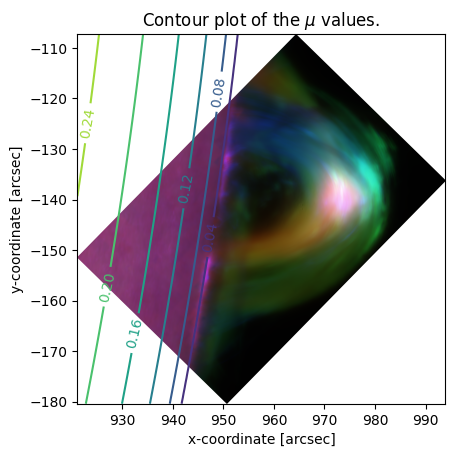

In [16]:
angle = 1.52*np.pi/6 + np.pi
frame = 0
extent = timeframe_to_extent(frame, ttff, invert=False, shift=(-1.2,0))
xx, yy, MU = extent_to_grid(extent, Hbeta.shape, invert=False, angle=angle)
xx0=xx
yy0=yy


mu = give_mu_contourplot(
    MU,
    xx,
    yy,
    extent,
    over=Hbeta,
    save=True,
    save_name=Hbeta.name_of_line,
    timeFrame=frame,
    rotate=angle
)
sst_data = Hbeta
theor_line = theor_Hbeta
set_mu(Hbeta, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_Hbeta.index_mu], theor_line.sst_clv[theor_Hbeta.index_mu][0], clv_fit(mu, theor_line)


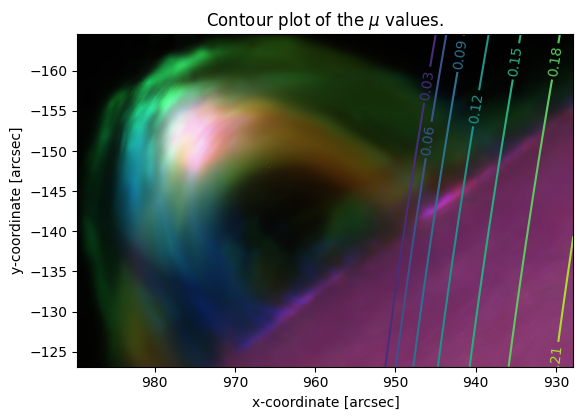

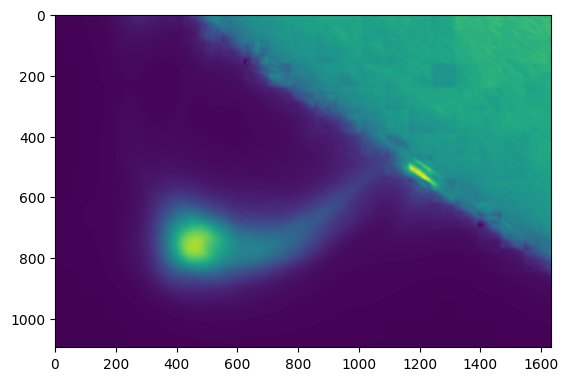

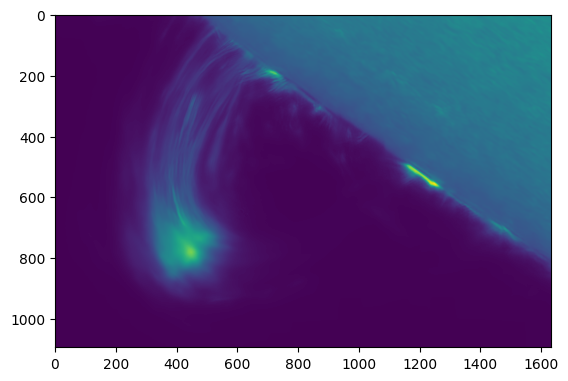

In [17]:
plt.imshow(Hbeta.datacube(0)[0])
plt.show()
plt.imshow(Hbeta.datacube(0)[-1])
plt.show()

c:\Users\Gebruiker\Anaconda3\Lib\site-packages\nessi\integrator.py:382: RuntimeWarning: invalid value encountered in sqrt
  ipts = _np.vstack([_np.atleast_2d(x), _np.atleast_2d(y), _np.atleast_2d(_np.sqrt(1.-(x**2+y**2)))])
c:\Users\Gebruiker\Anaconda3\Lib\site-packages\nessi\integrator.py:358: RuntimeWarning: invalid value encountered in arcsin
  mu = _np.cos(_np.arcsin(rad_dist))


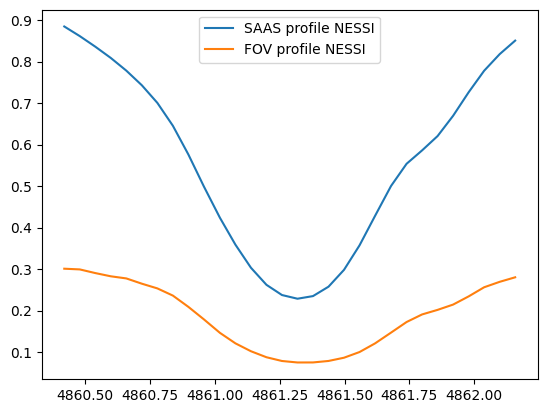

In [18]:
theor_Hbeta.set_fov( xx, yy, Hbeta.boundary, sr=959.63)


## Finding a suitable quiet sun patch

In [19]:
frame, Hbeta.shape

(0, (233, '??', 21, 1094, 1632))

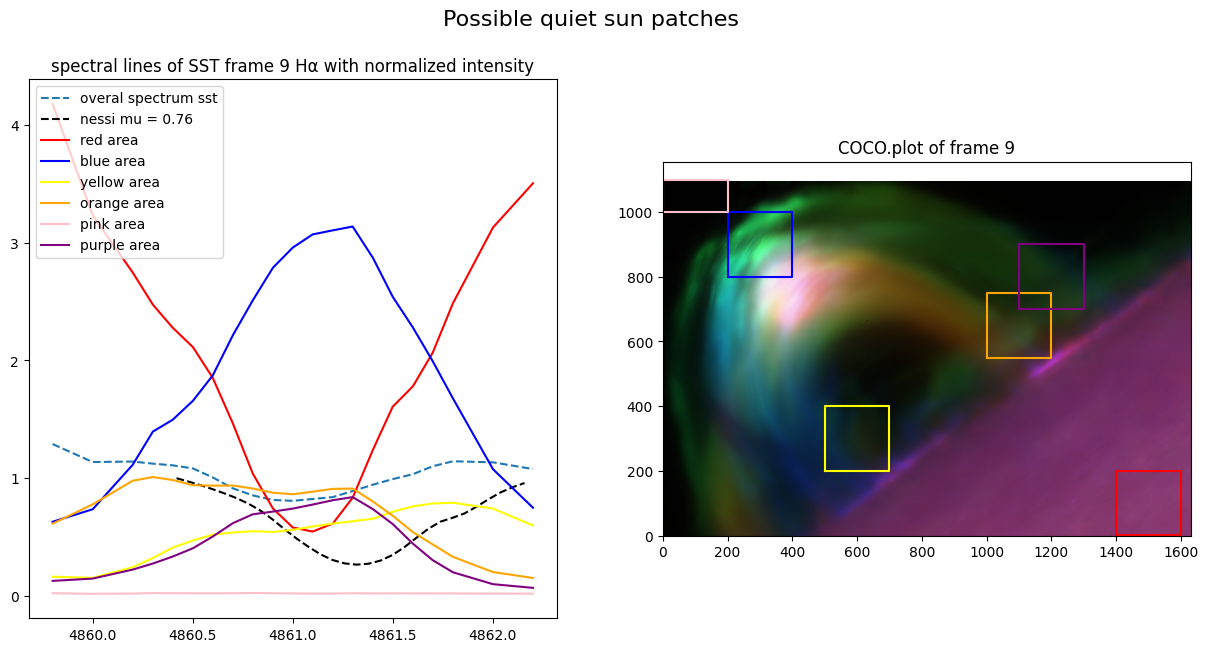

In [20]:
frame=9

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

Hbeta.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(1400,1600),(1,200)], [(200,400), (800, 1000)], [(500, 700), (200, 400)], [(1000,1200),(550,750)],[(0,200),(1000,1100)], [(1100,1300),(700, 900)]]
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title(
    f"spectral lines of SST frame {frame}"
    + " H\u03B1 with normalized intensity"
)
Hbeta.frame_integrated_spect(frame)
ax[0].plot(Hbeta._wavel, Hbeta.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_Hbeta.sst_wav + theta[0], theta[2] * theor_Hbeta.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]


ax[0].plot(theor_Hbeta.sst_wav + theta[0], theta[2] * theor_Hbeta.sst_dc*theor_Hbeta.sst_clv[0] + theta[1], '--', label='nessi mu = 0.76', color='black')

ax[1].imshow(Hbeta.current_ccp,origin='lower')
ax[1].set_title("COCO.plot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(Hbeta._wavel, Hbeta.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_Hbeta.png')
plt.show()


### Choose patch as quiet sun

fill in here which color the wanted quiet sun patch had 

In [21]:
color_wanted_patch = 'red'

In [22]:
np.shape(theor_Hbeta.fov[0])

(1094, 1632)

the edges of the patch are denoted by the xlim: (1400, 1600) and ylim: (1, 200)


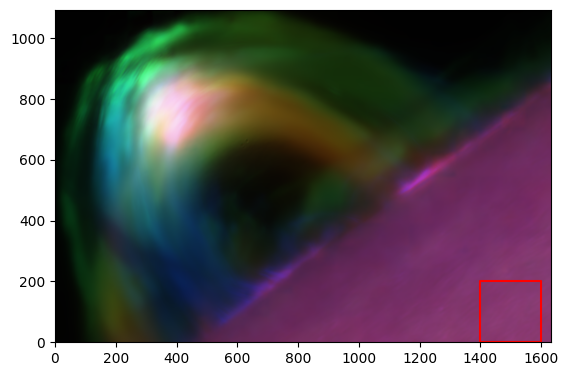

The quiet sun is pick at x (927.2986146677698, -150.51682673583252) with average              mu 0.20407438622940066


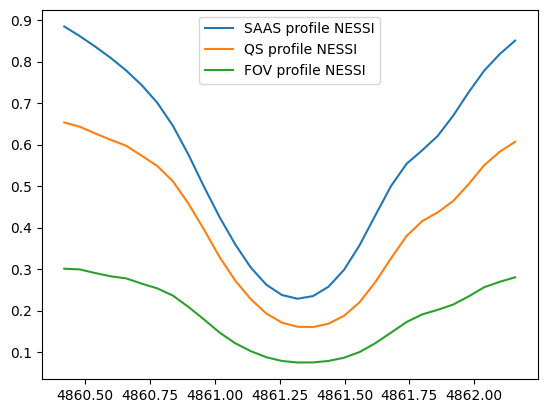

{'frame': 9, 'xlim': (1400, 1600), 'ylim': (1, 200), 'color': 'red'}

In [23]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)
reload(un)
Hbeta.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
plt.show()
theor_Hbeta.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
Hbeta.quiet_sun

[[0.9662644  0.96623677 0.96620914 ... 0.96082074 0.96079311 0.96076548]
 [0.96629262 0.96626499 0.96623735 ... 0.96084896 0.96082133 0.9607937 ]
 [0.96632084 0.9662932  0.96626557 ... 0.96087718 0.96084955 0.96082191]
 ...
 [0.97179506 0.97176743 0.9717398  ... 0.96635141 0.96632377 0.96629614]
 [0.97182328 0.97179565 0.97176801 ... 0.96637962 0.96635199 0.96632436]
 [0.9718515  0.97182387 0.97179623 ... 0.96640784 0.96638021 0.96635258]] [[-0.15130551 -0.15133373 -0.15136195 ... -0.15686439 -0.15689261
  -0.15692083]
 [-0.15133314 -0.15136136 -0.15138958 ... -0.15689202 -0.15692024
  -0.15694846]
 [-0.15136078 -0.15138899 -0.15141721 ... -0.15691966 -0.15694787
  -0.15697609]
 ...
 [-0.15672154 -0.15674975 -0.15677797 ... -0.16228041 -0.16230863
  -0.16233685]
 [-0.15674917 -0.15677739 -0.1568056  ... -0.16230805 -0.16233627
  -0.16236448]
 [-0.1567768  -0.15680502 -0.15683324 ... -0.16233568 -0.1623639
  -0.16239212]]
the avarage position is ((0.9663084883421421, -0.1568488133299631

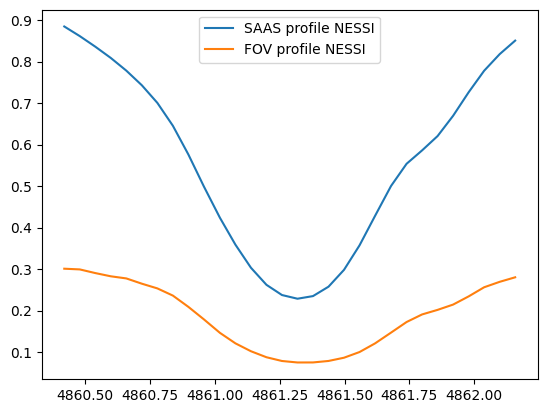

In [24]:
self = theor_Hbeta

a, b = xlim
c, d = ylim
X = self.fov[0][c:d, a:b]
Y = self.fov[1][c:d, a:b]
print(X, Y)
boundary = self.fov[2][c:d-1, a:b-1]
qs_spectra = np.array([boundary for _ in range(len(self.sst_wav))])
dx = (X[1:,1:] - X[0:-1,0:-1])
dy = (Y[1:,1:] - Y[0:-1,0:-1])
areafactor = np.nansum(dx*dy+boundary) /np.pi
x0, y0 = np.nanmean(X), np.nanmean(Y)
print(f"the avarage position is ({x0,y0}) yielding averge mu={calculate_mu(x0,y0, radius=1)}")
self.spectr_qs = -self.saas.get_diff_spectra_fov(X,Y,qs_spectra) / areafactor
plt.plot(self.sst_wav, self.saas_profile, label="SAAS profile NESSI")
plt.plot(self.sst_wav, self.spectr_fov, label="FOV profile NESSI")
plt.legend()
plt.show()

[4859.79946 4859.99955 4860.19964 4860.30062 4860.39973 4860.50071
 4860.59982 4860.7008  4860.79991 4860.90089 4861.      4861.09911
 4861.20009 4861.2992  4861.40018 4861.49929 4861.60027 4861.69938
 4861.80036 4862.00045 4862.20054] [4.17927824 3.23292355 2.74692828 2.47357644 2.27787256 2.11342902
 1.85241835 1.4633736  1.03942492 0.74247173 0.58153256 0.5468212
 0.61513688 0.83420995 1.2403785  1.60717359 1.78034306 2.06608033
 2.48545241 3.12835193 3.50436319] [0.75948818 0.72516485 0.69084152 0.67351946 0.65651818 0.63702922
 0.61111865 0.57998218 0.53491685 0.45479531 0.34910407 0.25694599
 0.19241243 0.16434897 0.16341414 0.18832485 0.25396411 0.34412192
 0.41592099 0.52132161 0.62394816]
[-0.28853993  4.72774454]
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 3408.3867523730987
        x: [-2.872e-01  4.126e+00]
      nit: 10
      jac: [ 6.104e-05  6.104e-05]
 hess_inv: [[ 2.954e-06 -2.551e-07]
            [-

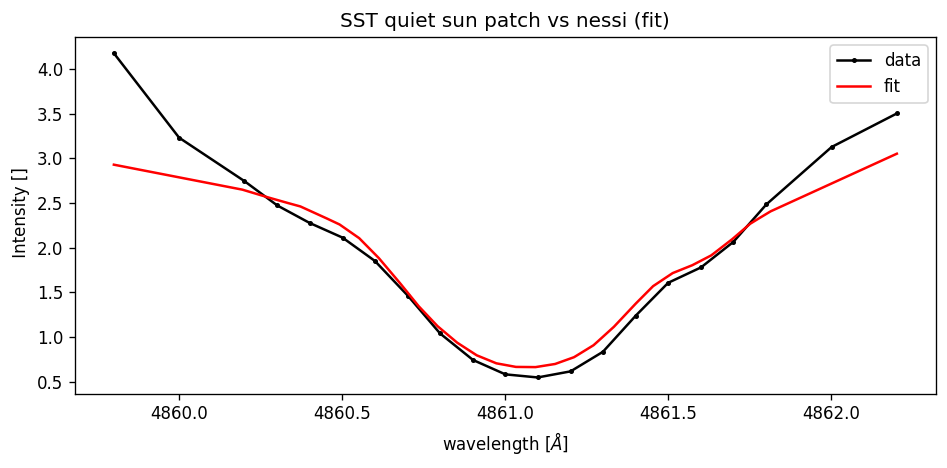

de p-waarde is  4.081391058841861e-28 
Chi^2 reduced= 179.3887764406894 
aantal vrijheidgraden= 19 
chi^2= 3408.3867523730987
we behouden de fit tot op een betrouwbaarheidsniveau van  4.081391058841861e-28 
Oftewel verwerp als p-waarde <lpha-niveau 


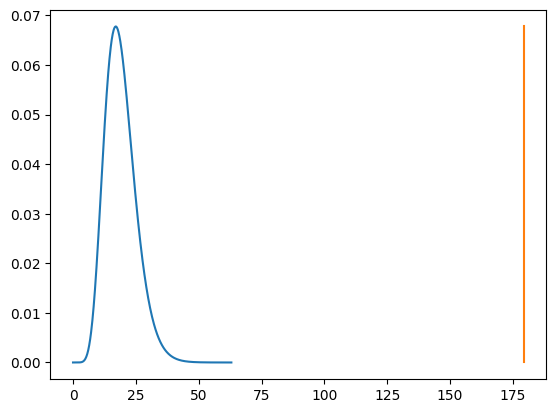

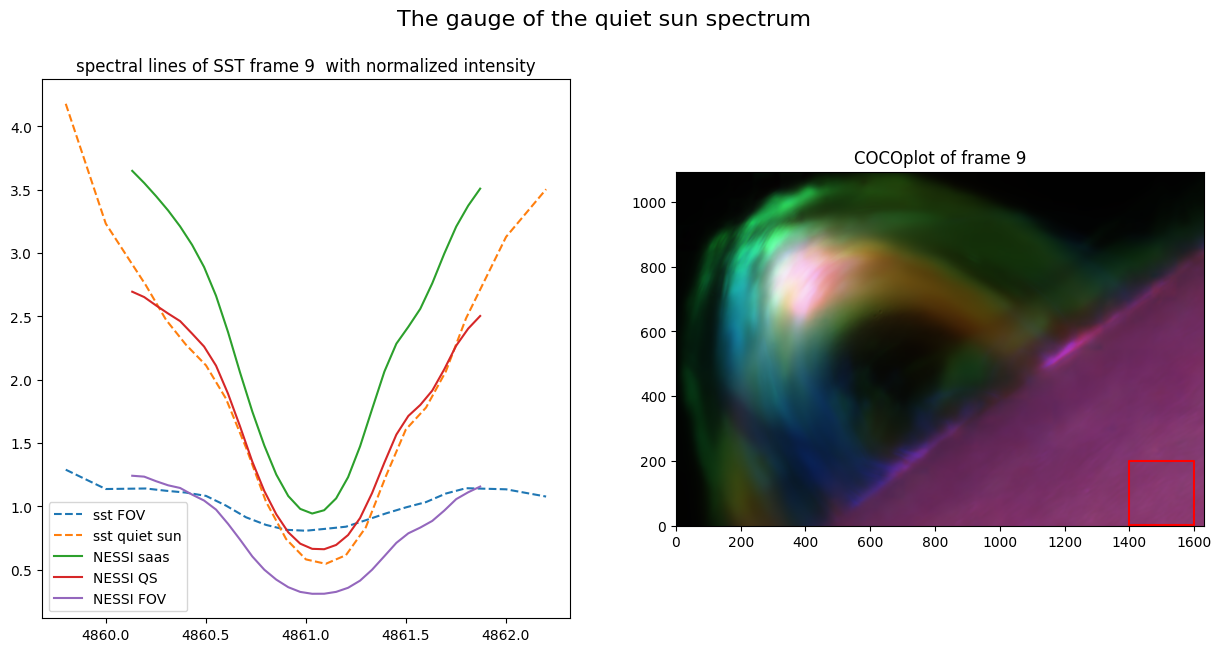

In [25]:
reload(un)
un.fit_qs_to_NESSI(theor_Hbeta, Hbeta)

## The full FOV integrated spectrum over time:

In [26]:
Hbeta.calculate__FOV_spect_over_time()

# Figure 4 In HARPS ALEX
![image.png](attachment:image.png)

Now we do it for the FOV spectum with as normalisation the quiet sun

[4.17927824 3.23292355 2.74692828 2.47357644 2.27787256 2.11342902
 1.85241835 1.4633736  1.03942492 0.74247173 0.58153256 0.5468212
 0.61513688 0.83420995 1.2403785  1.60717359 1.78034306 2.06608033
 2.48545241 3.12835193 3.50436319] [1.28109342 1.25762021 1.2302413  1.1723871  1.12058237 1.03461783
 0.88283731 0.6726218  0.48984582 0.3729398  0.31787381 0.31247464
 0.35171036 0.45495324 0.62108765 0.77172155 0.85812318 0.97898886
 1.10203334 1.25419864 1.40475219] [2.89818482 1.97530334 1.51668698 1.30118933 1.15729019 1.07881119
 0.96958103 0.7907518  0.5495791  0.36953193 0.26365875 0.23434656
 0.26342652 0.3792567  0.61929085 0.83545204 0.92221988 1.08709147
 1.38341908 1.87415329 2.099611  ]


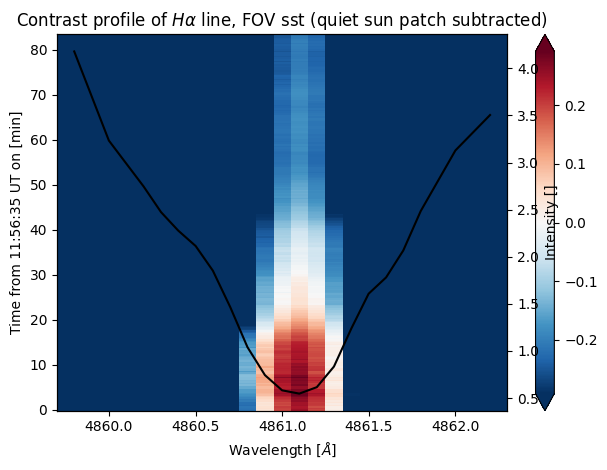

In [27]:
TIME = un.get_TIME(Hbeta)

FOV_spectrum = Hbeta.FOV_spectrum
QS = sst_data.quiet_spect
QS2 = theor_line.adapted_fov_spectr()(sst_data._wavel)
print(QS, QS2, QS - QS2)
Z = FOV_spectrum - QS
x = sst_data._wavel
y = Hbeta.TIME
TIME = y
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, FOV sst (quiet sun patch subtracted)')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,QS, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [28]:
Hbeta.stand_dev_quiet_sun()

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [19] at time ['t=16:32:38 UT'].
The areafactor for THIS flare is -1.0169456273719638e-05 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: -0.82%.


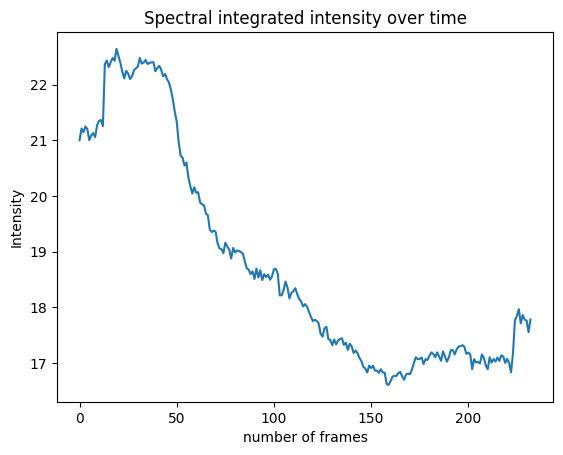

In [29]:
reload(un)
un.save_for_further_analysis(Hbeta, theor_Hbeta)


# Movie Making

frame: 0, 16:25:24, total number of frames: 233 


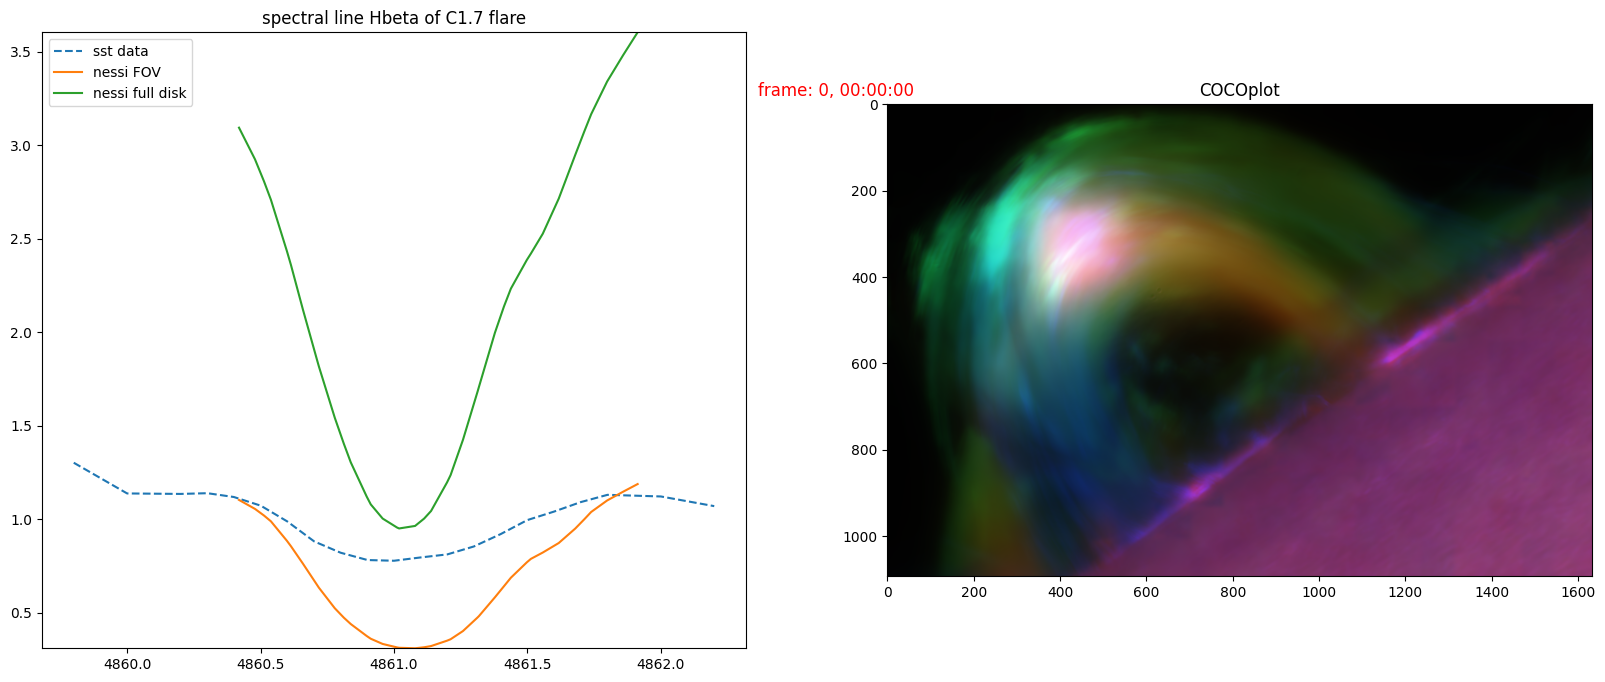

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 We are exiting this kernel
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Gebruiker\Anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_10172\2679919370.py", line 7, in <module>
    un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line)
  File "E:\solar flares/data/2017-09-06\use_nessi.py", line 2047, in Movie_making
NameError: name 'exit' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Gebruiker\Anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Gebruiker\Anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^

In [30]:
# fill in here all arguments
theor_line = theor_line
sst_data = Hbeta
name_of_flare = "C1.7"
name_of_line = "Hbeta"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line)

In [31]:
exit()

: 